# Completeness and implex

The goal of this script is to reproduce the results of figure 1 from the article by Gauvin et al. (2015) \<[doi:10.1186/s12859-015-0581-5](https://doi.org/10.1186/s12859-015-0581-5)>.

In [1]:
!python --version

Python 3.10.12


Seaborn will be used for plotting. The GENEO toolkit will be used to load the dataset and compute the mean completeness and implex per generation.

In [2]:
%pip install seaborn https://github.com/GPhMorin/geneo/archive/main.zip

     / 387.8 kB 1.5 MB/s 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for geneo: filename=geneo-0.1.0-cp310-cp310-linux_x86_64.whl size=454498 sha256=0cb74a0fc9cb451b3e9b3e710b11c2ca9bda851b16288ba12b11e4f68f35d32c
  Stored in directory: /tmp/pip-ephem-wheel-cache-k7q9n8nb/wheels/89/82/c1/060b4460912dd0579653a87158a8c256172b90f4689b85460d
Successfully built geneo


The GENEO toolkit makes extensive use of Pandas dataframes, in this case, for the mean completeness and implex per generation.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geneo as gen

The **genea140** dataset will be used, which according to the [GENLIB reference manual](https://cran.r-project.org/web/packages/GENLIB/GENLIB.pdf) corresponds to:
> "A genealogical corpus made of 41523 individuals from the province of Quebec, Canada. A total of 140 individuals have been sampled in seven sub-populations, listed in pop140, and their genealogies were reconstructed as far back as possible using the BALSAC population register and the Early Quebec Population Register.

In [4]:
ped = gen.genealogy(gen.genea140)
ped

A pedigree with:
41523 individuals;
68248 parent-child relations;
20773 men;
20750 women;
140 probands;
18 generations.

Now let's compute the mean completeness and implex per generation and concatenate them into a single Pandas dataframe.

In [5]:
completeness = gen.completeness(ped)
completeness

,mean
0,100.000000
1,100.000000
2,100.000000
3,97.857143
4,95.625000
5,90.982143
6,85.558036
7,80.636161
8,76.434152
9,72.201451


In [6]:
implex = gen.implex(ped)
implex

,mean
0,100.000000
1,100.000000
2,100.000000
3,97.500000
4,94.285714
5,87.790179
6,79.397321
7,71.746652
8,63.847656
9,53.338449


In [7]:
combined_df = pd.concat([completeness, implex], axis=1)
combined_df.columns = ['Completeness', 'Implex']
combined_df

,Completeness,Implex
0,100.000000,100.000000
1,100.000000,100.000000
2,100.000000,100.000000
3,97.857143,97.500000
4,95.625000,94.285714
5,90.982143,87.790179
6,85.558036,79.397321
7,80.636161,71.746652
8,76.434152,63.847656
9,72.201451,53.338449


Finally, let's see the results.

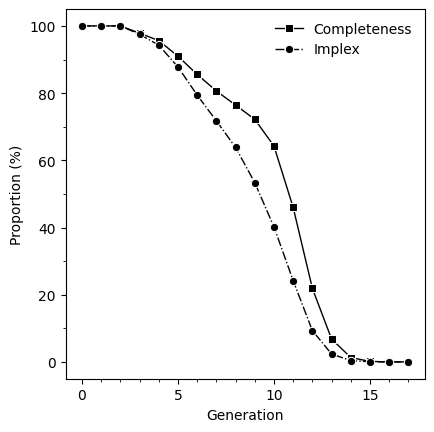

In [8]:
ax = sns.lineplot(data=combined_df['Completeness'], marker='s', color='black', linewidth=1, label='Completeness')
ax = sns.lineplot(data=combined_df['Implex'], marker='o', color='black', linestyle='dashdot', linewidth=1, label='Implex')
ax.set_aspect(aspect=17.5/100)
ax.set_xlabel('Generation')
ax.set_ylabel('Proportion (%)')
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(10))
ax.tick_params(axis='both', which='both', bottom=True, left=True)
ax.legend(frameon=False)